# Car Price Prediction Multiple Linear Regression

#### Predicting the Prices of cars using RFE and VIF

### Problem Statement

##### Predicting the price of cars based on a wide range of attributes and features. 
##### Using a dataset containing car details such as safety ratings, dimensions, engine specifications, 
##### and more, we aim to develop a machine learning model that accurately estimates the price of different car models.

###  Import Modules

In [115]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

import warnings 
warnings.filterwarnings('ignore')


In [116]:
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")
print(os.listdir(path))

['CarPrice_Assignment.csv', 'Data Dictionary - carprices.xlsx']


In [117]:
df = pd.read_csv(os.path.join(path,'CarPrice_Assignment.csv'))
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Checks to Perform
##### Check Missing values
##### Check Duplicates
##### Check data type
##### Check the number of unique values of each column
##### Check statistics of the dataset
##### Check various categories present in the different categorical columns

In [118]:
df1 = df.copy()
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [119]:
# Check Missing values
print(df1.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [120]:
# Check Duplicates
for col in df1.columns:
    if df[col].duplicated().any():
        df1.drop_duplicates()

print(df1.duplicated().sum())

0


In [121]:
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [122]:
#Check datatype

df1.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [123]:
# Check the number of unique values of each column
df1.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [124]:
#Check statistics of data set
measures = df1.describe()
print("Car Count:", measures["car_ID"]["count"])
print("Horsepower Mean:", measures["horsepower"]["mean"])
print("Price Min:", measures["price"]["min"])
print("Price Max:", measures["price"]["max"])


Car Count: 205.0
Horsepower Mean: 104.1170731707317
Price Min: 5118.0
Price Max: 45400.0


In [125]:
exc_col = ['CarName']
inc_col = df1.select_dtypes(include='object').columns

categorical_col = [col for col in inc_col if col not in exc_col]

for col in categorical_col:
    print(f"Category in {col} is :{df[col].unique()}")

Category in fueltype is :['gas' 'diesel']
Category in aspiration is :['std' 'turbo']
Category in doornumber is :['two' 'four']
Category in carbody is :['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Category in drivewheel is :['rwd' 'fwd' '4wd']
Category in enginelocation is :['front' 'rear']
Category in enginetype is :['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Category in cylindernumber is :['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Category in fuelsystem is :['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


### Exploratory data analysis

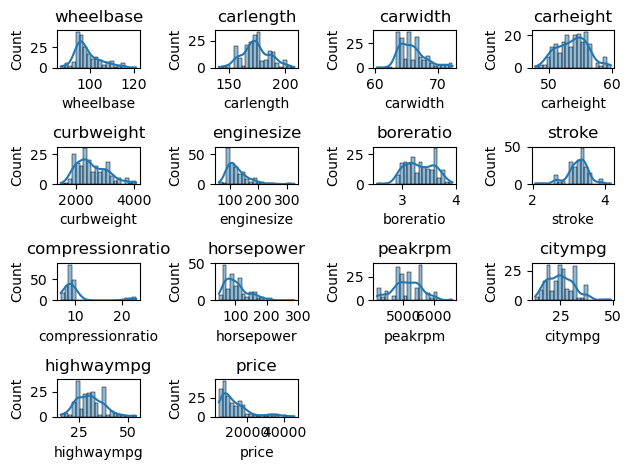

In [126]:
# Distribution of Numerical Features
exclude_col = ['car_ID','symboling']
include_col = df1.select_dtypes(include=['int', 'float']).columns

numerical_col = [col for col in include_col if col not in exclude_col]

plt.Figure(figsize=(3,5))
for feature in numerical_col:
   plt.subplot(4,4,numerical_col.index(feature)+1)
   sns.histplot(data=df1[feature], bins=20, kde=True)
   plt.title(feature)

plt.tight_layout()
plt.show()


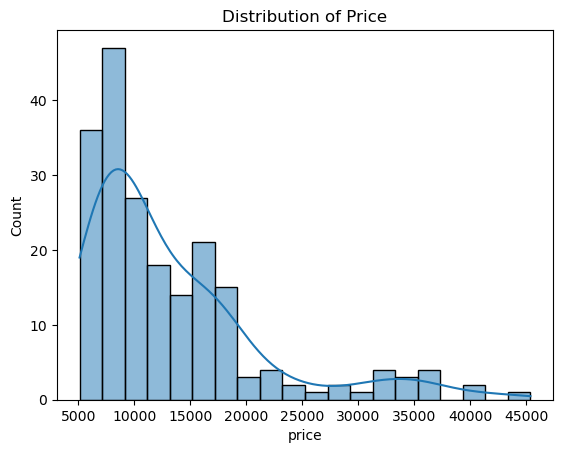

In [127]:
# Price Analysis

plt.Figure(figsize=(8,6))
sns.histplot(data=df1['price'], bins=20,kde=True)
plt.title("Distribution of Price")
plt.show()

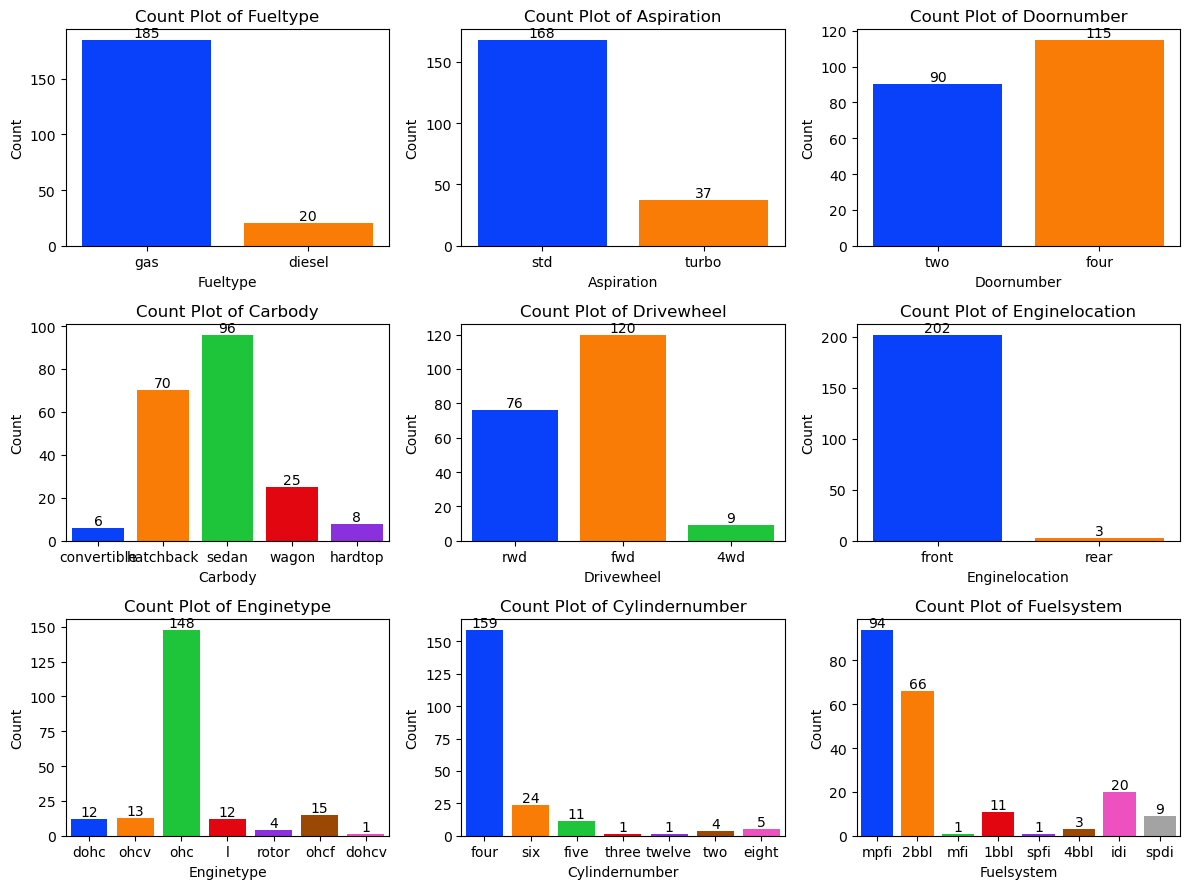

In [128]:
# Create subplots

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,9))
axes  = axes.ravel() #Flatten the 2D array of axes

for i, column in enumerate(categorical_col):
    sns.countplot(x=df[column], data=df1, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f"Count Plot of {column.capitalize()}")
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


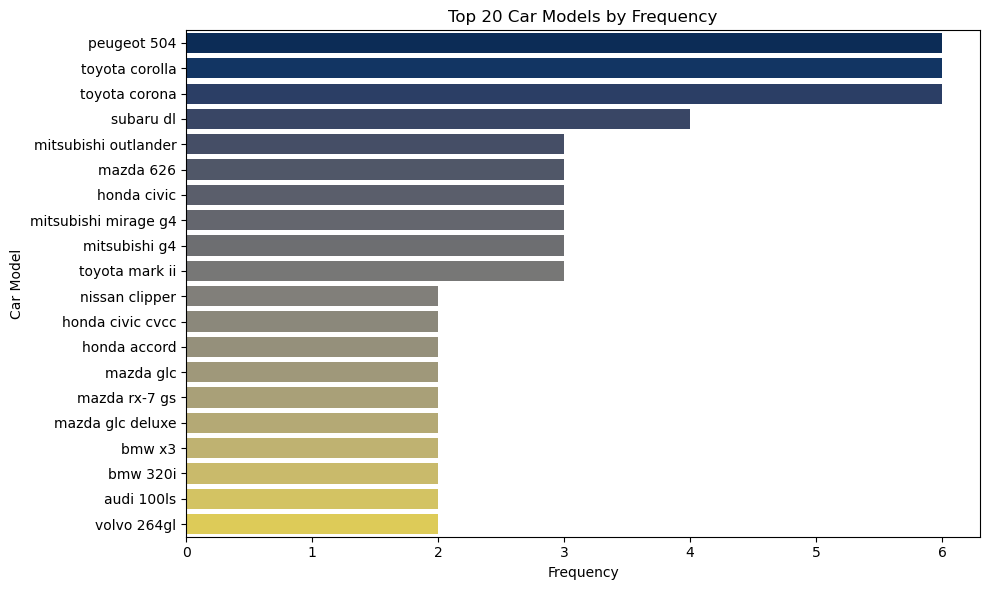

In [129]:
# Number of top car models to plot
n = 20
top_cars = df1['CarName'].value_counts().head(n)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cars.values, y=top_cars.index,  palette="cividis")
plt.title(f"Top {n} Car Models by Frequency")
plt.xlabel("Frequency")
plt.ylabel("Car Model")
plt.tight_layout()
plt.show()


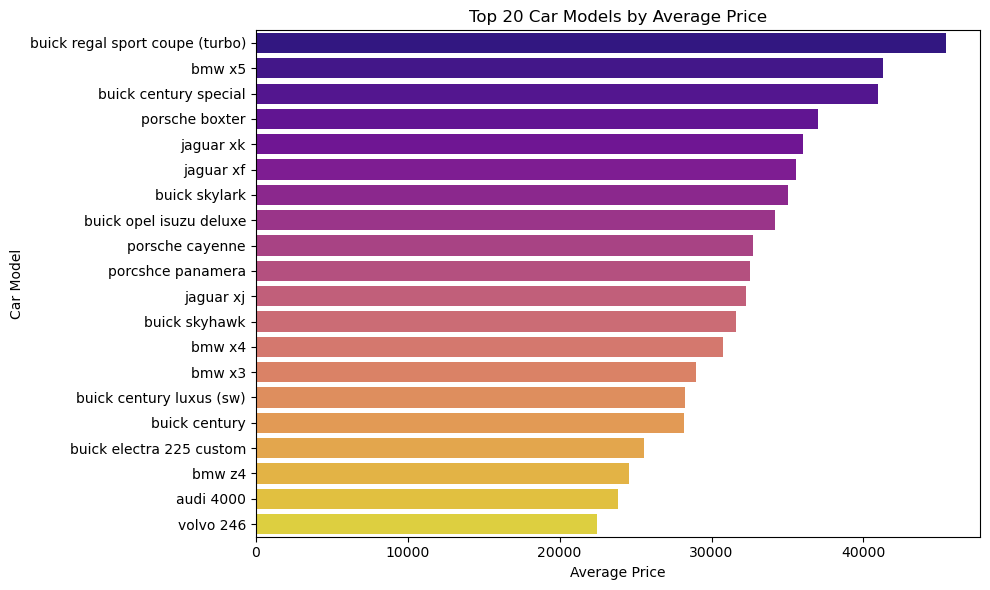

In [130]:
# Calculate average price for each car model

avg_price = df1.groupby('CarName')['price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
m = 20
top_car = avg_price.head(m)


plt.figure(figsize=(10,6))
sns.barplot(x=top_car.values, y=top_car.index,  palette="plasma")
plt.title(f"Top {n} Car Models by Average Price")
plt.xlabel("Average Price")
plt.ylabel("Car Model")
plt.tight_layout()
plt.show()

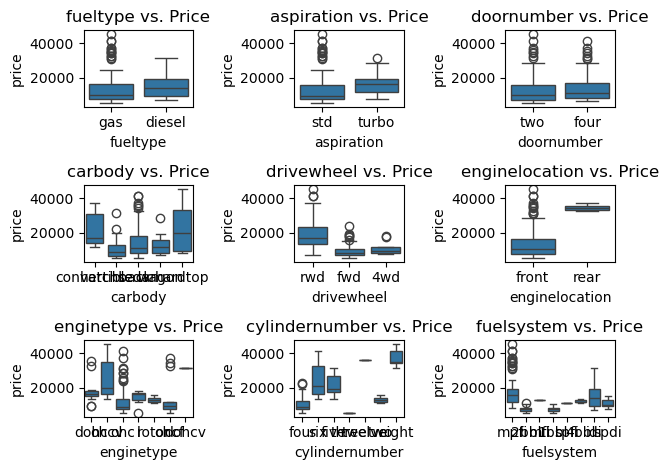

In [131]:
# Categorical Feature vs. Price
plt.Figure(figsize=(12,8))
for feature in categorical_col:
    plt.subplot(3,3,categorical_col.index(feature)+1)
    sns.boxplot(data=df1, x=feature, y='price')
    plt.title(f"{feature} vs. Price")
plt.tight_layout()
plt.show()


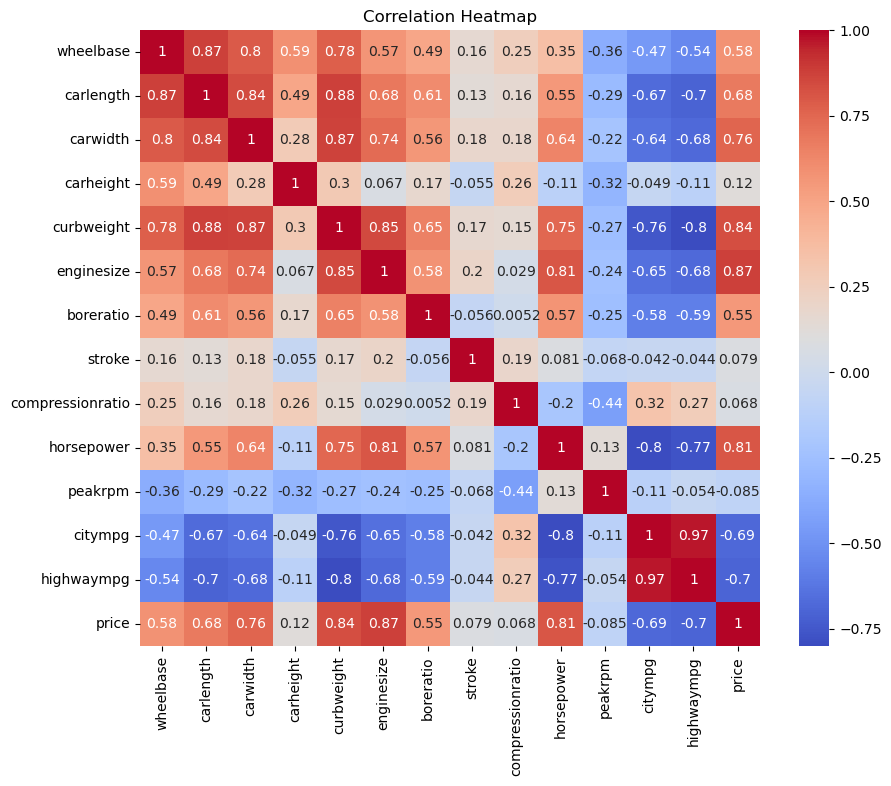

In [132]:
# Correlation Analysis
correlation_matrix = df[numerical_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Data Pre-Processing

In [133]:
# Extract brand and model from CarName

df1['brand'] = df1['CarName'].apply(lambda x:x.split(' ')[0])
df1['model'] = df1['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Encoding categorical variables
new_categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
new_numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

Label_encoder = LabelEncoder()
for col in new_categorical_columns:
    df1[col] = Label_encoder.fit_transform(df1[col])

# Feature engineering

df1['power_to_weight_ration'] = df1['horsepower'] / df1['curbweight']

for col in new_numerical_columns:
    df1[f"{col}_squared"] = df1[col]**2
df1['log_engine_size'] = np.log(df1['enginesize']+1)

# Feature scaling

scaler = StandardScaler()
df1[new_numerical_columns] = scaler.fit_transform(df1[new_numerical_columns])


### Train the Model

In [139]:
# Splitting the dataset

X = df1.drop(['price','CarName'], axis=1)
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

# Model training

regressor = LinearRegression()
regressor.fit(X_train,y_train)

# Predictions

y_pred = regressor.predict(X_test)

X_train shape: (164, 41)
X_test shape: (41, 41)
y_train shape: (164,)
y_test shape: (41,)


In [140]:
# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(f"R-Squared : {r2}")
print(f'Mean Squared Error : {mse}')

R-Squared : 0.8615670883713219
Mean Squared Error : 10928450.666046169


In [141]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted value': y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted value,Difference
15,30760.000,24644.498950,6115.501050
9,17859.167,19770.234282,-1911.067282
100,9549.000,8323.732429,1225.267571
132,11850.000,13885.801568,-2035.801568
68,28248.000,26718.615842,1529.384158
95,7799.000,7079.308258,719.691742
159,7788.000,10106.850951,-2318.850951
162,9258.000,6570.571030,2687.428970
147,10198.000,10418.264320,-220.264320
182,7775.000,10904.998479,-3129.998479
